# The First TensorFlow Keras Model and check TensorFlow GPU version installation

### Why to do this : 
https://stackoverflow.com/questions/47068709/your-cpu-supports-instructions-that-this-tensorflow-binary-was-not-compiled-to-u

In [29]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

### Make sure your tensorflow-gpu package can catch your GPU, if it can, then it means you install successfully.

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

ImportError: Traceback (most recent call last):
  File "C:\Users\Bryant Liu\.conda\envs\Keras-TensorFlow\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\Bryant Liu\.conda\envs\Keras-TensorFlow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\Bryant Liu\.conda\envs\Keras-TensorFlow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\Bryant Liu\.conda\envs\Keras-TensorFlow\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\Bryant Liu\.conda\envs\Keras-TensorFlow\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

This tensorflow-gpu version is 1.13.1, we can try to use previous version 1.12.0. 

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7461322060149640951
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1477437030
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7811281589961978398
physical_device_desc: "device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


Obviously, it is the issue about version. So after this experience, I have to think about the version problem when I install or set something.

In [2]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess

# To start a keras module to check the TensorFlow GPU-version enviroment is available or not.

In [3]:
import numpy as np
np.random.seed(123)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
from matplotlib import pyplot as plt
%matplotlib inline

## Load pre-shuffled MNIST data into train and test sets. 

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

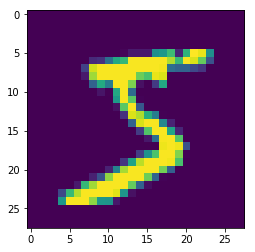

In [9]:
plt.imshow(x_train[0])

In [10]:
x_train = x_train.reshape(x_train.shape[0], 1 ,28, 28)
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)

In [11]:
x_train.shape

(60000, 1, 28, 28)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [13]:
y_train.shape

(60000,)

In [14]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [15]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [16]:
y_train.shape

(60000, 10)

In [21]:
model = Sequential()

In [28]:
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))

## If we use previous code, you will get a Syntax Error.
## The reason of why the error happen is the default input to be in the format in Conv2D is (samples, rows, cols, channels), but our data input to be in the format is (samples, channels, rows, cols). Hence we should to use the optional keyword [data_format = 'channels_first'] when declaring the Conv2D layer. By the way, the situation is the same in Convolution2D layer.
The answer is in the url:
https://stackoverflow.com/questions/45645276/negative-dimension-size-caused-by-subtracting-3-from-1-for-conv2d-2-convolution/45647715

In [22]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))

In [23]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

C:\Users\iAirJordan\ANACONDA3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 37s 624us/step - loss: 0.2500 - acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.1004 - acc: 0.9703
Epoch 3/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.0784 - acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.0647 - acc: 0.9804
Epoch 5/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.0550 - acc: 0.9832
Epoch 6/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.0497 - acc: 0.9848
Epoch 7/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.0441 - acc: 0.9863
Epoch 8/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.0399 - acc: 0.9876
Epoch 9/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.0370 - acc: 0.9881
Epoch 10/10
60000/60000 [==============================] - 36s 602us/step - loss: 

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.03466139629872227, 0.9903]